In [1]:
import numpy as np
import os
import dill
import importlib
import pandas as pd
import sys
import itertools

In [2]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import Subject_Object_v2
importlib.reload(Subject_Object_v2)

<module 'Subject_Object_v2' from 'D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Subject_Object_v2.py'>

# Select Experiment

In [3]:
experiment = 'Exp2'

if experiment == 'Exp1':
    coincidence_trials = 50
    interval_trials = 50
    reaction_trials = 50
    reaction_blocks = 3
    trial_time = 5000
    task_blocks = 6
    task_trials = 80
elif experiment == 'Exp2':
    coincidence_trials = 50
    interval_trials = 50
    reaction_trials = 100
    reaction_blocks = 3
    trial_time = 8000
    task_blocks = 4
    task_trials = 80

## Initial Thangs

In [4]:
# Fields pull and pull list
PATH = f'D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_{experiment}'
os.chdir(PATH)
figures_pull_list = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Agent_Shutoff_Go'

In [5]:
# num_subjects = 5

## dill Load

dill Load Reaction and Timing Tasks


In [6]:

# ---------------Controls-------------------------
reaction_trial_start          = np.zeros((num_subjects, reaction_blocks, reaction_trials))*np.nan
reaction_filenames            = np.empty((num_subjects, reaction_blocks,reaction_trials),dtype = object)
agent_reaction_leave_time     = np.zeros((num_subjects, reaction_blocks,reaction_trials))*np.nan
agent_reaction_decision_array = np.empty((num_subjects, reaction_blocks,reaction_trials))*np.nan
reaction_trial_type_array     = np.zeros((num_subjects, reaction_blocks,reaction_trials))*np.nan
reaction_xypos_data           = np.zeros((num_subjects, reaction_blocks,reaction_trials, trial_time,2))*np.nan
reaction_dist_data            = np.zeros((num_subjects, reaction_blocks,reaction_trials, trial_time))*np.nan
reaction_xyvelocity_data      = np.zeros((num_subjects, reaction_blocks,reaction_trials, trial_time,2))*np.nan
reaction_speed_data           = np.zeros((num_subjects, reaction_blocks,reaction_trials, trial_time))*np.nan
# reaction_xyforce_data         = np.zeros((num_subjects, reaction_blocks,reaction_trials, trial_time,2))*np.nan
# reaction_force_data           = np.zeros((num_subjects, reaction_blocks,reaction_trials, trial_time))*np.nan 

coincidence_trial_start                       = np.zeros((num_subjects, coincidence_trials))*np.nan
coincidence_reach_time                        = np.zeros((num_subjects, coincidence_trials))*np.nan
interval_trial_start                          = np.zeros((num_subjects, interval_trials))*np.nan
interval_reach_time                           = np.zeros((num_subjects, interval_trials))*np.nan

for i in range(num_subjects):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    reaction_trial_start[i,...]          = dill.load(open(data_path + f'{subname}_reaction_trial_start.pkl','rb'))          
    reaction_trial_type_array[i,...]          = dill.load(open(data_path + f'{subname}_reaction_trial_type_array.pkl','rb'))          
    # reaction_filenames[i,...]            = dill.load(open(data_path + f'{subname}_reaction_filenames.pkl','rb'))            
    agent_reaction_leave_time[i,...]     = dill.load(open(data_path + f'{subname}_agent_reaction_leave_time.pkl','rb'))  
    agent_reaction_decision_array[i,...] = dill.load(open(data_path + f'{subname}_agent_reaction_decision_array.pkl','rb')) 
    reaction_xypos_data[i,...]           = dill.load(open(data_path + f'{subname}_reaction_xypos_data.pkl','rb'))           
    reaction_dist_data[i,...]            = dill.load(open(data_path + f'{subname}_reaction_dist_data.pkl','rb'))            
    reaction_xyvelocity_data[i,...]      = dill.load(open(data_path + f'{subname}_reaction_xyvelocity_data.pkl','rb'))      
    reaction_speed_data[i,...]           = dill.load(open(data_path + f'{subname}_reaction_speed_data.pkl','rb'))           
    # reaction_xyforce_data[i,...]         = dill.load(open(data_path + f'{subname}_reaction_xyforce_data.pkl','rb'))         
    # reaction_force_data[i,...]           = dill.load(open(data_path + f'{subname}_reaction_force_data.pkl','rb')) 
    interval_trial_start[i,:]            = dill.load(open(data_path + f'{subname}_interval_trial_start.pkl', 'rb'))
    interval_reach_time[i,:]             = dill.load(open(data_path + f'{subname}_interval_reach_time.pkl', 'rb'))
    coincidence_trial_start[i,:]         = dill.load(open(data_path + f'{subname}_coincidence_trial_start.pkl', 'rb'))
    coincidence_reach_time[i,:]          = dill.load(open(data_path + f'{subname}_coincidence_reach_time.pkl', 'rb'))
    print(subname)

Sub1
Sub2
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12
Sub13
Sub14
Sub15
Sub16
Sub17


dill Load Task and Washout

In [7]:
path1 = PATH+'\\'+'Sub1_Task'
task_df = pd.read_csv(path1+f'\\Sub1_TaskTrial_Table.csv')
task_df = task_df.loc[task_df['Condition type']==3] # Only get the task condition 
num_trials = int(task_df.iloc[-1]['Block_Step']) # number of trials in each block
num_blocks = int(task_df.iloc[-1]['Block_Row'])
tot_trials = int(num_trials*num_blocks)
trial_time = int(task_df.iloc[0]['Condition time'])
task_df_columns = len(fields_pull)
trial_time = 2000
# ---------------Controls-------------------------
task_trial_start          = np.zeros((num_subjects, task_blocks, task_trials))*np.nan
task_filenames            = np.empty((num_subjects, task_blocks,task_trials),dtype = object)
agent_task_leave_time     = np.zeros((num_subjects, task_blocks,task_trials))*np.nan
agent_task_decision_array = np.empty((num_subjects, task_blocks,task_trials))*np.nan
task_xypos_data           = np.zeros((num_subjects, task_blocks,task_trials, trial_time,2))*np.nan
task_dist_data            = np.zeros((num_subjects, task_blocks,task_trials, trial_time))*np.nan
task_xyvelocity_data      = np.zeros((num_subjects, task_blocks,task_trials, trial_time,2))*np.nan
task_speed_data           = np.zeros((num_subjects, task_blocks,task_trials, trial_time))*np.nan
# task_xyforce_data         = np.zeros((num_subjects, task_blocks,task_trials, trial_time,2))*np.nan
# task_force_data           = np.zeros((num_subjects, task_blocks,task_trials, trial_time))*np.nan 

for i in range(num_subjects):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    task_trial_start[i,...]          = dill.load(open(data_path + f'{subname}_task_trial_start.pkl','rb'))          
    # task_filenames[i,...]            = dill.load(open(data_path + f'{subname}_task_filenames.pkl','rb'))            
    agent_task_leave_time[i,...]     = dill.load(open(data_path + f'{subname}_agent_task_leave_time.pkl','rb'))  
    agent_task_decision_array[i,...] = dill.load(open(data_path + f'{subname}_agent_task_decision_array.pkl','rb')) 
    task_xypos_data[i,...]           = dill.load(open(data_path + f'{subname}_task_xypos_data.pkl','rb'))           
    task_dist_data[i,...]            = dill.load(open(data_path + f'{subname}_task_dist_data.pkl','rb'))            
    task_xyvelocity_data[i,...]      = dill.load(open(data_path + f'{subname}_task_xyvelocity_data.pkl','rb'))      
    task_speed_data[i,...]           = dill.load(open(data_path + f'{subname}_task_speed_data.pkl','rb'))           
    # task_xyforce_data[i,...]         = dill.load(open(data_path + f'{subname}_task_xyforce_data.pkl','rb'))         
    # task_force_data[i,...]           = dill.load(open(data_path + f'{subname}_task_force_data.pkl','rb'))

## Generate Subject Objects

In [8]:
path1 = PATH+'\\'+'Sub1_Task'
task_df = pd.read_csv(path1+f'\\Sub1_TaskTrial_Table.csv')
task_df = task_df.loc[task_df['Condition type']==3] # Only get the task condition 
num_trials = int(task_df.iloc[-1]['Block_Step']) # number of trials in each block
if experiment == 'Exp2':
    num_blocks = int(task_df.iloc[-1]['Block_Row'])
    num_reaction_trials = 100
else:
    num_blocks = int(task_df.iloc[-1]['Block_Row']/2)
    num_reaction_trials = 50
tot_trials = int(num_trials*num_blocks)
trial_time = int(task_df.iloc[0]['Condition time']) + 500
task_df_columns = len(fields_pull)
trial_table = np.empty((num_subjects, tot_trials, 4), int)

data_path = 'Subjects_Analyzed\\'
subject_objects = []
for i in range(num_subjects):
    subname = figures_pull_list[i]
    print(subname)
    subject_object = Subject_Object_v2.Subject(
        subject = subname,experiment = experiment, num_task_trials_initial = num_trials, num_task_blocks = num_blocks, num_reaction_blocks = 3, num_reaction_trials = num_reaction_trials,num_timing_trials = 50,
        reaction_trial_start = reaction_trial_start[i],
        reaction_xypos_data = reaction_xypos_data[i],reaction_dist_data = reaction_dist_data[i],
        reaction_xyvelocity_data = reaction_xyvelocity_data[i],reaction_speed_data = reaction_speed_data[i],reaction_trial_type_array = reaction_trial_type_array[i], agent_reaction_decision_array = agent_reaction_decision_array[i],
        agent_reaction_leave_time = agent_reaction_leave_time[i], 
        
        task_xypos_data = task_xypos_data[i], task_dist_data = task_dist_data[i], task_xyvelocity_data = task_xyvelocity_data[i], task_speed_data = task_speed_data[i],
        interval_trial_start = interval_trial_start[i], interval_reach_time = interval_reach_time[i], coincidence_trial_start = coincidence_trial_start[i], coincidence_reach_time = coincidence_reach_time[i],
        agent_task_leave_time = agent_task_leave_time[i], agent_task_decision_array = agent_task_decision_array[i],
                                )
    subject_objects.append(subject_object)
    # subject_objects.analyze
    # group_first = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_velocity_task_leave_time_thresh',task_movement_time_metric_name = 'player_velocity_task_movement_time_thresh',
    #                                     reaction_time_metric_name = 'player_velocity_reaction_time_thresh', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_thresh')
    # print(subject_object.init_reach_direction)
    # dill.dump(subject_object, open(data_path + f'{subname}\\{subname}_object.pkl', 'wb'))

Sub1
Sub2
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12
Sub13
Sub14
Sub15
Sub16
Sub17


In [9]:
group_first = Subject_Object_v2.Group(subject_objects, select_trials = 'First Half', num_stds_for_reaction_time = 2, 
                                        task_leave_time_metric_name = 'player_velocity_task_leave_time_thresh',task_movement_time_metric_name = 'player_velocity_task_movement_time_thresh',
                                        reaction_time_metric_name = 'player_velocity_reaction_time_thresh', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_thresh')
group_first.analyze_data()

D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:499: RuntimeWarning: All-NaN slice encountered
  self.init_reach_posx_single_timepoint = np.nanmax(self.init_reach_posx*self.init_reach_pos_mask,axis=2)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:564: RuntimeWarning: divide by zero encountered in divide
  self.mu_s = (self.phat_correct*self.mhat_correct - self.phat_error*self.mhat_error)/(self.phat_correct - self.phat_error)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:575: RuntimeWarning: divide by zero encountered in divide
  self.mu_s_alternate = (self.phat_correct*self.mhat_correct_alternate - self.phat_error*self.mhat_error_alternate)/(self.phat_correct - self.phat_error)


In [10]:
group_first.reaction_time

array([[[         nan, 359.11334229, 502.96832275, ..., 484.98712158,
         341.46954346,          nan],
        [296.94909668, 285.88323975, 314.08398438, ...,          nan,
                  nan,          nan],
        [275.37121582, 268.18121338, 243.1875    , ...,          nan,
                  nan,          nan]],

       [[         nan, 406.42407227,          nan, ..., 421.7925415 ,
         300.80151367, 518.85180664],
        [401.54089355, 284.43615723, 309.68206787, ...,          nan,
                  nan,          nan],
        [341.3336792 , 254.03686523, 250.85638428, ...,          nan,
                  nan,          nan]],

       [[         nan, 270.42407227, 396.11334229, ...,          nan,
         324.87884521, 349.9854126 ],
        [309.98181152, 312.67974854, 261.84094238, ...,          nan,
                  nan,          nan],
        [270.2522583 , 171.39099121, 173.20928955, ...,          nan,
                  nan,          nan]],

       ...,

       [[

In [11]:
# for i in range(20):
#     subject_objects[i].analyze_data(select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
#                                 task_leave_time_metric_name = 'player_pos_task_leave_time', task_movement_time_metric_name = 'player_pos_task_movement_time',
#                                 reaction_time_metric_name = 'player_pos_reaction_time', reaction_movement_time_metric_name = 'player_pos_reaction_movement_time')

IndexError: index 40 is out of bounds for axis 1 with size 40

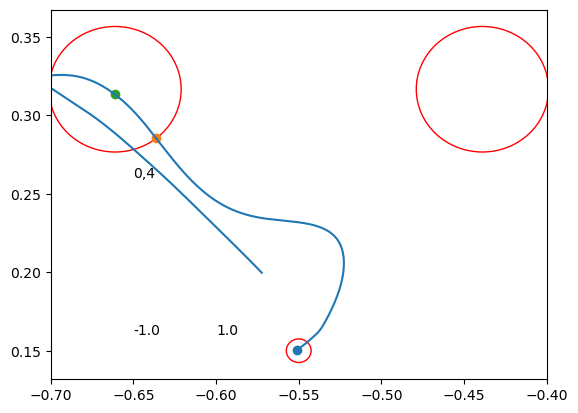

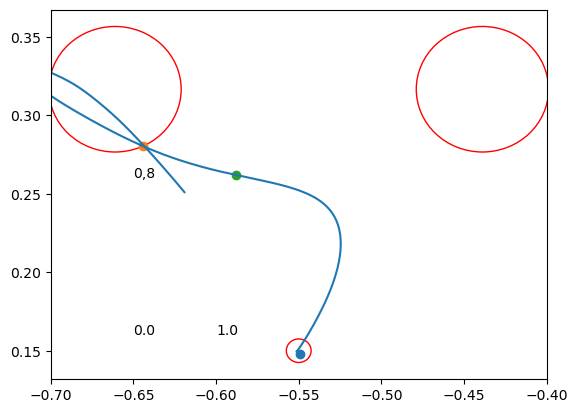

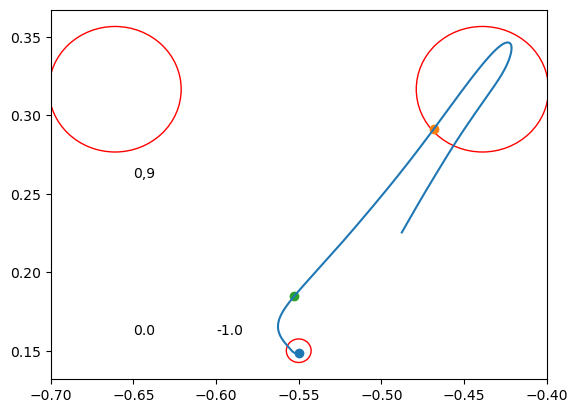

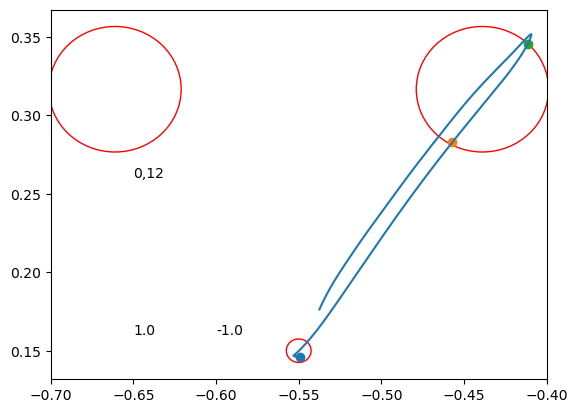

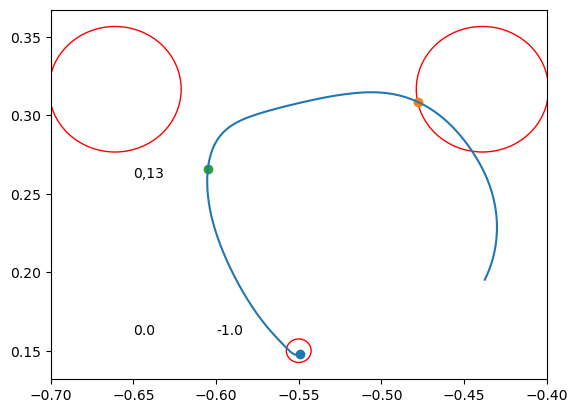

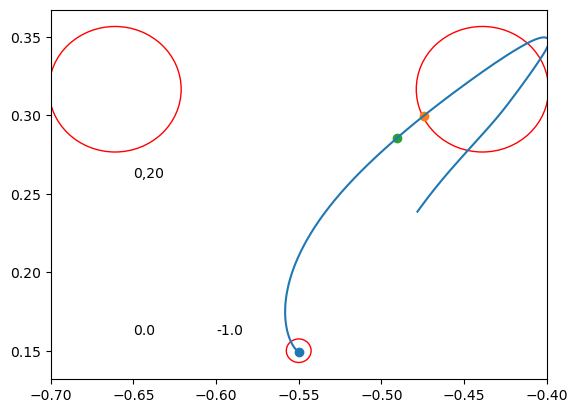

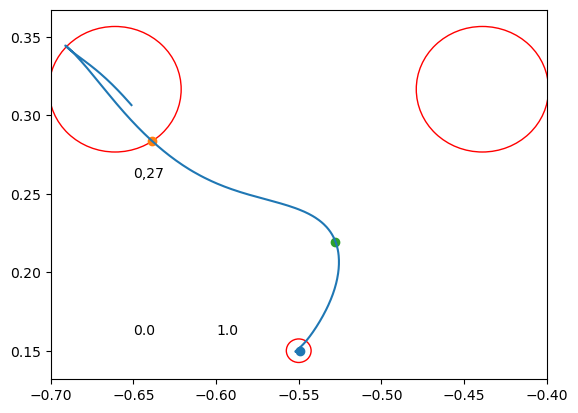

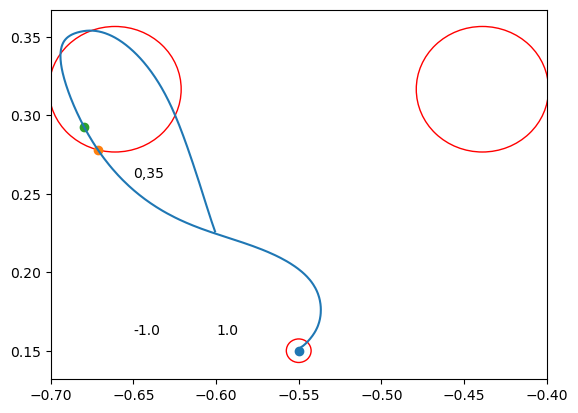

In [12]:
import matplotlib.pyplot as plt
for i in range(4):
    for j in range(80):
        if ~subject_object.check_init_reach_direction[i,j]:
            if np.isnan(subject_object.player_task_decision_array_check[i,j]):
                continue
            circleR = plt.Circle((subject_object.target1x,subject_object.target1y), subject_object.target1_radius, color = 'r', fill = False)
            circleL = plt.Circle((subject_object.target2x,subject_object.target2y), subject_object.target2_radius, color = 'r', fill = False)
            startCirc = plt.Circle((subject_object.startx,subject_object.starty), subject_object.start_radius, color = 'r', fill = False)
            fig, ax = plt.subplots()
            ax.add_patch(circleR)
            ax.add_patch(circleL)
            ax.add_patch(startCirc)
            ax.plot(subject_object.task_xypos_data[i,j,:,0],subject_object.task_xypos_data[i,j,:,1])
            ax.scatter(subject_object.task_xypos_data[i,j,int(subject_object.init_reach_posx_single_timepoint[i,j]),0],subject_object.task_xypos_data[i,j,int(subject_object.init_reach_posx_single_timepoint[i,j]),1])
            ax.scatter(subject_object.task_xypos_data[i,j,int(subject_object.player_task_reach_time[i,j]),0],subject_object.task_xypos_data[i,j,int(subject_object.player_task_reach_time[i,j]),1])
            ax.scatter(subject_object.task_xypos_data[i,j,1500,0],subject_object.task_xypos_data[i,j,1500,1])
            ax.set_xlim(-0.7,-0.4)
            ax.text(-0.6,0.16,subject_object.init_reach_direction[i,j])
            ax.text(-0.65,0.16,subject_object.player_task_decision_array[i,j])
            ax.text(-0.65,0.26,f'{i},{j}')
            
            

AttributeError: 'Subject' object has no attribute 'time_for_init_reach_angle'

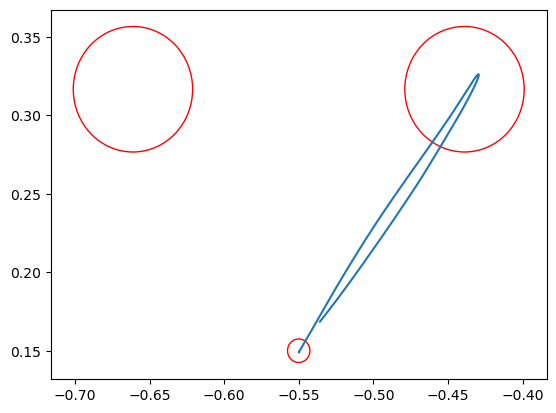

In [ ]:
circleR = plt.Circle((subject_object.target1x,subject_object.target1y), subject_object.target1_radius, color = 'r', fill = False)
circleL = plt.Circle((subject_object.target2x,subject_object.target2y), subject_object.target2_radius, color = 'r', fill = False)
startCirc = plt.Circle((subject_object.startx,subject_object.starty), subject_object.start_radius, color = 'r', fill = False)
fig, ax = plt.subplots()
ax.add_patch(circleR)
ax.add_patch(circleL)
ax.add_patch(startCirc)
ax.plot(subject_object.task_xypos_data[i,j,:,0],subject_object.task_xypos_data[i,j,:,1])
ax.scatter(subject_object.task_xypos_data[i,j,int(subject_object.time_for_init_reach_angle[i,j]),0],subject_object.task_xypos_data[i,j,int(subject_object.time_for_init_reach_angle[i,j]),1])
ax.scatter(subject_object.task_xypos_data[i,j,int(subject_object.player_task_reach_time[i,j]),0],subject_object.task_xypos_data[i,j,int(subject_object.player_task_reach_time[i,j]),1])
ax.set_xlim(-0.7,-0.4)
ax.text(-0.6,0.16,subject_object.init_reach_direction[i,j])
ax.text(-0.65,0.16,subject_object.player_task_decision_array[i,j])
ax.text(-0.65,0.26,f'{i},{j}')

In [ ]:
mask = np.isnan(subject_object.init_reach_angle)
subject_object.init_reach_angle[~mask].reshape((subject_object.init_reach_angle.shape[:-1]))

AttributeError: 'Subject' object has no attribute 'init_reach_angle'